Part_a

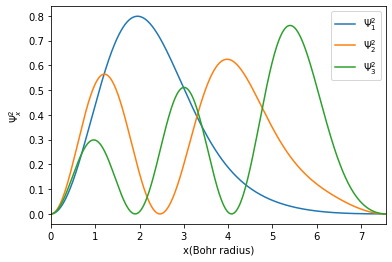

In [26]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from numpy import sin , cos , pi
ha,bo= 27.211386 , 1.88973
V0 , L = 40/ha , 4*bo 
N = 5
ha,bo= 27.211386 , 1.88973
V0 , L = 40/ha , 4*bo 
Xmin , Xmax = 0,L
global N
h = (Xmax - Xmin)/N
x = np.arange(Xmin,Xmax, h)
c0 = 2/(h**2)
c1= -1/(h**2)
T = c0*np.diag(np.ones(N-1))+c1*np.diag(np.ones(N-2),1)+c1*np.diag(np.ones(N-2),-1)
V = np.diag(np.zeros(N-1))
for i,j in enumerate(x[1:]):
        V[i][i] = 2*V0*(j/L)

H = T + V
val , vec = la.eigh(H)

def f(x,m,L,vec):
    psi = 0
    for n in range(1,N):
        psi = psi + (2/np.sqrt(L))*(vec[n-1][m-1]*sin((n*pi*x)/L))
    return psi**2

x = np.linspace(0,L,1000)
for i in range(1,4):
    plt.plot(x,S:=f(x,i,L,vec),label="$Ψ_%i^2$"%i)
    plt.legend()
    plt.xlim(min(x),max(x))
    plt.xlabel("x(Bohr radius)")
    plt.ylabel("$Ψ_x^2$")
plt.show()


Part_B

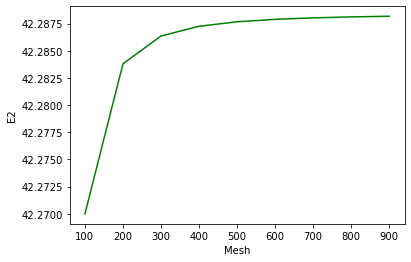

In [30]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
E_list = []
N_list = []
for N in range(100,1000,100):
    ha,bo= 27.211386 , 1.88973
    V0 , L = 40/ha , 4*bo 
    Xmin , Xmax = 0,L

    h = (Xmax - Xmin)/N
    x = np.arange(Xmin,Xmax, h)
    c0 = 2/(h**2)
    c1= -1/(h**2)
    T = c0*np.diag(np.ones(N-1))+c1*np.diag(np.ones(N-2),1)+c1*np.diag(np.ones(N-2),-1)

    V = np.diag(np.zeros(N-1))
    for i,j in enumerate(x[1:]):
            V[i][i] = 2*V0*(j/L)

    H = T + V
    val , vec = la.eigh(H)
    N_list.append(N)
    E_list.append(val[2]*ha*(1/2))
plt.plot(N_list,E_list,color = "green")
plt.xlabel("Mesh")
plt.ylabel("E2")
plt.show()

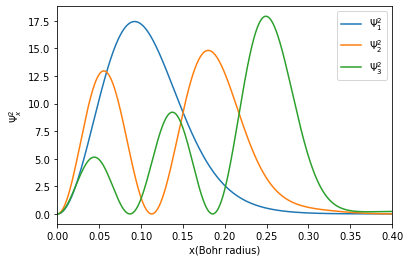

In [35]:
#part_a with great N
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from numpy import sin , cos , pi
ha,bo= 27.211386 , 1.88973
V0 , L = 40/ha , 4*bo 
N = 100
ha,bo= 27.211386 , 1.88973
V0 , L = 40/ha , 4*bo 
Xmin , Xmax = 0,L
global N
h = (Xmax - Xmin)/N
x = np.arange(Xmin,Xmax, h)
c0 = 2/(h**2)
c1= -1/(h**2)
T = c0*np.diag(np.ones(N-1))+c1*np.diag(np.ones(N-2),1)+c1*np.diag(np.ones(N-2),-1)
V = np.diag(np.zeros(N-1))
for i,j in enumerate(x[1:]):
        V[i][i] = 2*V0*(j/L)

H = T + V
val , vec = la.eigh(H)

def f(x,m,L,vec):
    psi = 0
    for n in range(1,N):
        psi = psi + (2/np.sqrt(L))*(vec[n-1][m-1]*sin((n*pi*x)/L))
    return psi**2

x = np.linspace(0,0.4,1000)
for i in range(1,4):
    plt.plot(x,S:=f(x,i,L,vec),label="$Ψ_%i^2$"%i)
    plt.legend()
    plt.xlim(min(x),max(x))
    plt.xlabel("x(Bohr radius)")
    plt.ylabel("$Ψ_x^2$")
plt.show()


[16.95126055 29.80499342 42.28843406]


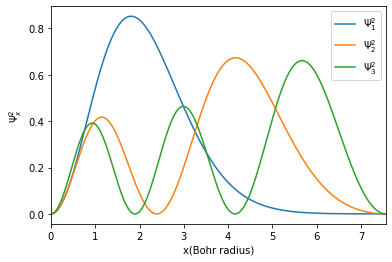

In [1]:
import numpy as np#part_a بسط تابع موج
import numpy.linalg as la
import matplotlib.pyplot as plt
from numpy import sin , cos , pi
from scipy.integrate import quad
ha,bo= 27.211386 , 1.88973
V0 , L = 40/ha , 4*bo 
r = 10
H = np.diag(np.zeros(r))

def Vfunc(x,L,V0,m,n):
    V1 = (2/L)*sin((m*pi*x)/L)*(V0*(x/L))*sin((n*pi*x)/L)
    return V1

for m in range(1,r+1):
    for n in range(1,r+1):
        if m==n:
            H[m-1][n-1] = quad(Vfunc,0,L,args = (L,V0,m,n))[0] + (1/2)*((n*pi)/L)**2
        else :
            H[m-1][n-1] = quad(Vfunc,0,L,args = (L,V0,m,n))[0]

val,vec = la.eigh(H)
print(val[:3]*ha)



def f(x,m,L,vec):
    psi = 0
    for n in range(1,r+1):
        psi = psi + (2/np.sqrt(L))*(vec[n-1][m-1]*sin((n*pi*x)/L))
    return psi**2

x = np.linspace(0,L,1000)
for i in range(1,4):
    plt.plot(x,S:=f(x,i,L,vec),label="$Ψ_%i^2$"%i)
    plt.legend()
    plt.xlim(min(x),max(x))
    plt.xlabel("x(Bohr radius)")
    plt.ylabel("$Ψ_x^2$")